In [79]:
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
from spicy import stats
from statsmodels.stats.outlers_influence import variance_inflation_factor

ModuleNotFoundError: No module named 'statsmodels.stats.outlers_influence'

# 1. 데이터 준비
### 자동차 연비 데이터셋 가져오기

In [66]:
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('/Users/mac/Documents/GitHub/python-training/notebooks/pandas-data-analysis/part7/data/auto-mpg.csv')

# 열 이름 지정
# mpg(mile per gallon) : 연비 단위 (주유 1리터 당 연료 주압했을 때 치량 주행량, 연비와 마력은 반비례 관계)
# cylinders : 엔진
# displacement : 엔진 배기량 (내연기관의 피스톤이 빨아들이거나 밀어내는 부피, 엔진 배기량의 크기와 자동차 출력 비례 관계)
# HP, horsepower : 마력 (내연 기관의 일률 / 마력과 속도는 비례 관계)
# weight : 차량 무게
# acceleration : 차량 가속

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


# 2. 데이터 탐색

In [67]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


In [68]:
# 데이터 통계 요약정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [69]:
# 누락 데이터 확인
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [70]:
# 중복 데이터 확인 
df.duplicated().sum()

np.int64(0)

# 3. 데이터 전처리

In [71]:
# 데이터 결측치 카운팅
display(df.horsepower.isnull().sum())

# Nan값을 제외한 결측치 카운팅
display(df['horsepower'].count())

# Nan값을 포함한 결측치 카운팅
display(df['horsepower'].size)

# 데이터 타입 변경
df['horsepower'].unique()

np.int64(0)

np.int64(397)

397

array(['165.0', '150.0', '140.0', '198.0', '220.0', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0', '?',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '130.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [72]:
# 'horsepower'열의 고유 값 확인
df['horsepower'].unique()

# 비정상적인 값 NaN값 처리
df['horsepower'] = df['horsepower'].replace('?', np.nan)

# NaN값 확인
df['horsepower'].isnull().sum()

# 결측치 포함된 행 제거
df = df.dropna(subset='horsepower')

# 'horsepower'열 데이터타입 obj -> float 변경
df['horsepower'] = df['horsepower'].astype('float64')


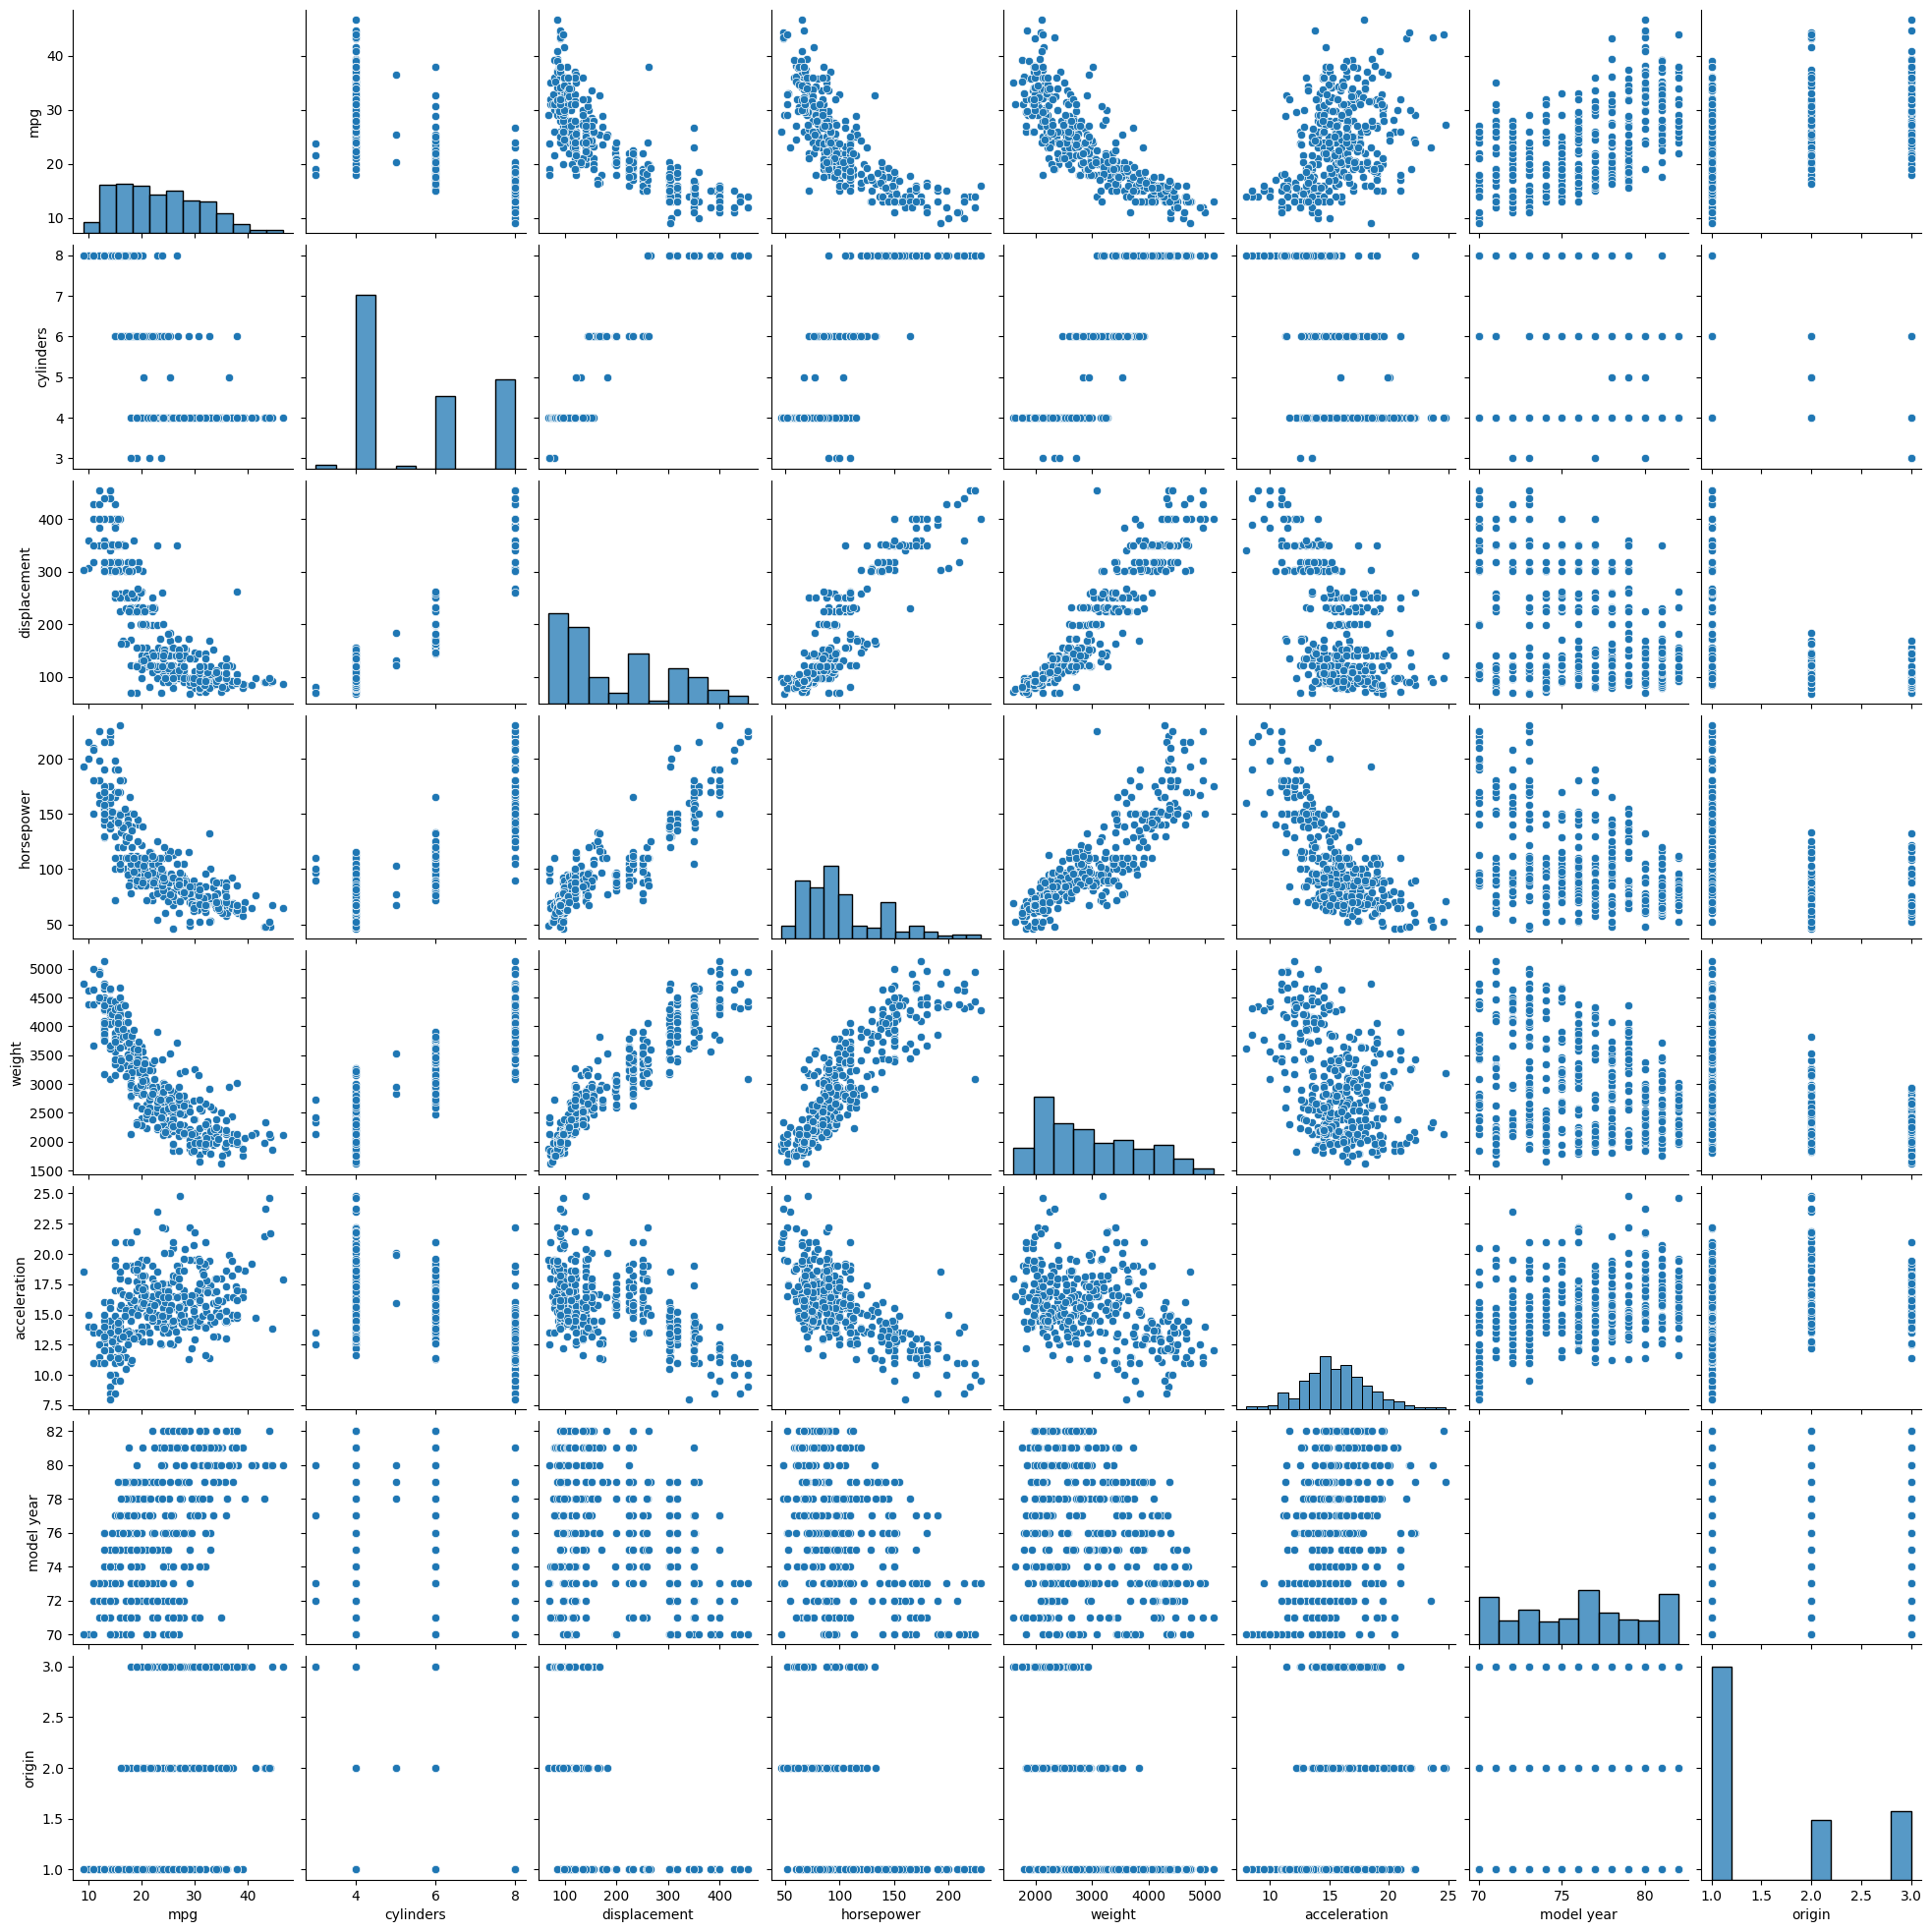

In [73]:
# pairplot은 여러 데이터셋의 변수 간 관계 파악을 위해 EDA 과정에서 많이 사용함
sns.pairplot(df)

In [74]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(method='pearson', numeric_only=True)

<Axes: >

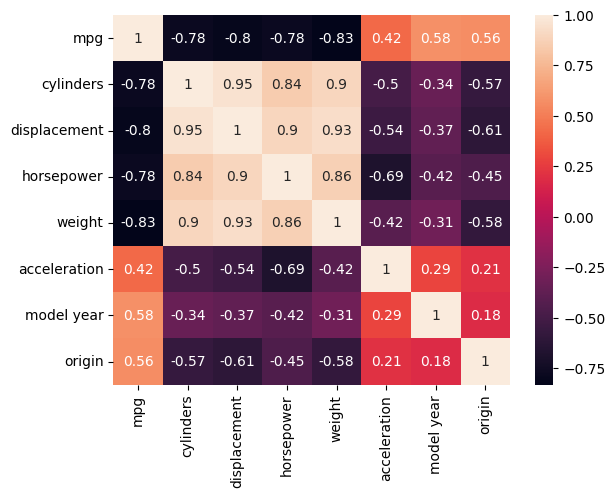

In [76]:
# 상관계수 분석 - 히트맵
sns.heatmap(corr, annot=True)